In [1]:
import os
import re
import json
import pandas as pd
import numpy as np
import utils
import cleaning
import analysis

In [2]:
imdb = pd.read_csv(os.path.join('zippedData', 'imdb.title.basics.csv.gz'))
imdb

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,NaN


In [3]:
tmdb = pd.read_csv(os.path.join('zippedData', 'tmdb.movies.csv.gz'), parse_dates=['release_date'], index_col=0)
tmdb

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...
26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


In [4]:
tmdb[tmdb.duplicated(keep=False)]

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
10,"[16, 35, 10751]",863,en,Toy Story 2,22.698,1999-11-24,Toy Story 2,7.5,7553
43,"[35, 10749]",239,en,Some Like It Hot,14.200,1959-03-18,Some Like It Hot,8.2,1562
54,"[12, 28, 878]",20526,en,TRON: Legacy,13.459,2010-12-10,TRON: Legacy,6.3,4387
56,"[35, 16, 10751]",9994,en,The Great Mouse Detective,13.348,1986-07-02,The Great Mouse Detective,7.1,769
...,...,...,...,...,...,...,...,...,...
26481,"[35, 18]",270805,en,Summer League,0.600,2013-03-18,Summer League,4.0,3
26485,"[27, 53]",453259,en,Devils in the Darkness,0.600,2013-05-15,Devils in the Darkness,3.5,1
26504,"[27, 35, 27]",534282,en,Head,0.600,2015-03-28,Head,1.0,1
26510,[99],495045,en,Fail State,0.600,2018-10-19,Fail State,0.0,1


In [5]:
tmdb.drop_duplicates(inplace=True)
tmdb

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...
26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


In [11]:
tn = pd.read_csv(os.path.join('zippedData', 'tn.movie_budgets.csv.gz'), parse_dates=['release_date'])

del tn['id']
tn.insert(0, 'tn_id', np.arange(tn.shape[0]) + 1)
tn.insert(2, 'release_year', tn['release_date'].dt.year)
tn

,tn_id,release_date,release_year,movie,production_budget,domestic_gross,worldwide_gross
0,1,2009-12-18,2009,Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,2011-05-20,2011,Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,2019-06-07,2019,Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,2015-05-01,2015,Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,2017-12-15,2017,Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...,...
5777,5778,2018-12-31,2018,Red 11,"$7,000",$0,$0
5778,5779,1999-04-02,1999,Following,"$6,000","$48,482","$240,495"
5779,5780,2005-07-13,2005,Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,5781,2015-09-29,2015,A Plague So Pleasant,"$1,400",$0,$0


In [12]:
money_cols = ['production_budget', 'domestic_gross', 'worldwide_gross']
tn[money_cols] = (tn.loc[:, money_cols]
                    .apply(cleaning.process_strings)
                    .apply(lambda x: x.astype('int64')))
tn = tn.query('(domestic_gross > 0) & (worldwide_gross > 0)')
# tn = tn.loc[(tn[['domestic_gross', 'worldwide_gross']] > 0).all(axis=1)]
tn.sort_values('worldwide_gross').head()

,tn_id,release_date,release_year,movie,production_budget,domestic_gross,worldwide_gross
5770,5771,2008-08-14,2008,The Rise and Fall of Miss Thang,10000,401,401
5518,5519,2005-10-13,2005,The Dark Hours,400000,423,423
5769,5770,1996-04-01,1996,Bang,10000,527,527
5466,5467,2018-05-11,2018,Higher Power,500000,528,528
5027,5028,1993-01-01,1993,Ed and his Dead Mother,1800000,673,673


In [18]:
imdb['clean_title'] = cleaning.process_strings(imdb.loc[:, 'primary_title'])
tmdb['clean_title'] = cleaning.process_strings(tmdb.loc[:, 'title'])
tn = tn.assign(clean_title=cleaning.process_strings(tn['movie']))

In [19]:
imdb_tn = pd.merge(imdb, tn, how='inner', left_on=['start_year', 'clean_title'], right_on=['release_year', 'clean_title'])
imdb_tn

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,clean_title,tn_id,release_date,release_year,movie,production_budget,domestic_gross,worldwide_gross
0,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",the secret life of walter mitty,437,2013-12-25,2013,The Secret Life of Walter Mitty,91000000,58236838,187861183
1,tt0365907,A Walk Among the Tombstones,A Walk Among the Tombstones,2014,114.0,"Action,Crime,Drama",a walk among the tombstones,2067,2014-09-19,2014,A Walk Among the Tombstones,28000000,26017685,62108587
2,tt0369610,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",jurassic world,34,2015-06-12,2015,Jurassic World,215000000,652270625,1648854864
3,tt0376136,The Rum Diary,The Rum Diary,2011,119.0,"Comedy,Drama",the rum diary,1316,2011-10-28,2011,The Rum Diary,45000000,13109815,21544732
4,tt0383010,The Three Stooges,The Three Stooges,2012,92.0,"Comedy,Family",the three stooges,1904,2012-04-13,2012,The Three Stooges,30000000,44338224,54052249
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1422,tt7958736,Ma,Ma,2019,99.0,"Horror,Thriller",ma,4266,2019-05-31,2019,MA,5000000,36049540,44300625
1423,tt7959026,The Mule,The Mule,2018,116.0,"Crime,Drama,Thriller",the mule,1100,2018-12-14,2018,The Mule,50000000,103804407,170857676
1424,tt8155288,Happy Death Day 2U,Happy Death Day 2U,2019,100.0,"Drama,Horror,Mystery",happy death day 2u,3778,2019-02-13,2019,Happy Death Day 2U,9000000,28051045,64179495
1425,tt8632862,Fahrenheit 11/9,Fahrenheit 11/9,2018,128.0,Documentary,fahrenheit 119,4329,2018-09-21,2018,Fahrenheit 11/9,5000000,6352306,6653715


In [20]:
tmdb_tn = pd.merge(tmdb, tn, how='inner', on=['release_date', 'clean_title'])
tmdb_tn

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,clean_title,tn_id,release_year,movie,production_budget,domestic_gross,worldwide_gross
0,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,how to train your dragon,130,2010,How to Train Your Dragon,165000000,217581232,494870992
1,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,iron man 2,115,2010,Iron Man 2,170000000,312433331,621156389
2,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174,toy story,1837,1995,Toy Story,30000000,191796233,364545516
3,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186,inception,138,2010,Inception,160000000,292576195,835524642
4,"[28, 12, 14, 878]",19995,en,Avatar,26.526,2009-12-18,Avatar,7.4,18676,avatar,1,2009,Avatar,425000000,760507625,2776345279
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1248,"[28, 16, 14, 12, 35, 878]",503314,ja,ドラゴンボール超スーパー ブロリー,6.868,2019-01-16,Dragon Ball Super: Broly,7.4,721,dragon ball super broly,3836,2019,Dragon Ball Super: Broly,8500000,30376755,122747755
1249,"[16, 12, 10751, 36, 10752]",433694,en,Sgt. Stubby: An American Hero,6.107,2018-04-13,Sgt. Stubby: An American Hero,6.4,9,sgt stubby an american hero,2306,2018,Sgt. Stubby: An American Hero,25000000,3054285,3645957
1250,"[18, 10752]",514407,en,Indivisible,5.599,2018-10-26,Indivisible,5.4,13,indivisible,4793,2018,Indivisible,2700000,3511417,3588305
1251,"[18, 28, 80]",547590,en,El Chicano,5.274,2019-05-03,El Chicano,9.0,1,el chicano,3916,2019,El Chicano,8000000,700261,700261


In [8]:
imdb.info()
imdb.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


,start_year,runtime_minutes
count,146144.000000,114405.000000
mean,2014.621798,86.187247
std,2.733583,166.360590
min,2010.000000,1.000000
25%,2012.000000,70.000000
50%,2015.000000,87.000000
75%,2017.000000,99.000000
max,2115.000000,51420.000000


In [9]:
imdb.drop(index=imdb.query('start_year > 2019').index, inplace=True)
imdb['start_year'].describe()

count    145081.000000
mean       2014.580441
std           2.688429
min        2010.000000
25%        2012.000000
50%        2015.000000
75%        2017.000000
max        2019.000000
Name: start_year, dtype: float64

In [10]:
cleaning.nan_info(imdb)

,Total,Percent
runtime_minutes,30765,21.205396
genres,5359,3.693799
original_title,20,0.013785
tconst,0,0.000000
primary_title,0,0.000000
start_year,0,0.000000


<AxesSubplot:>

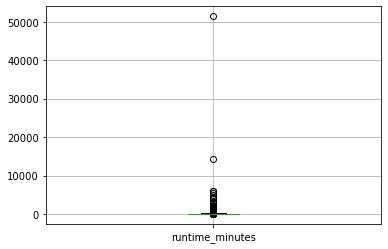

In [11]:
imdb.boxplot('runtime_minutes')

In [12]:
cleaning.outlier_info(imdb)

,Total,Percent
runtime_minutes,6825,4.704269
start_year,0,0.000000


array([[<AxesSubplot:title={'center':'runtime_minutes'}>]], dtype=object)

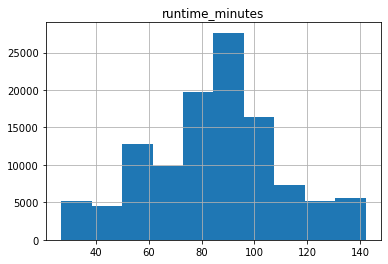

In [13]:
#should probably clip outliers instead of lumping with nans
runtime_outliers = cleaning.find_outliers(imdb.runtime_minutes)
bounds = imdb.loc[~runtime_outliers, 'runtime_minutes'].agg(['min', 'max'])
imdb['runtime_minutes'] = imdb.loc[:, 'runtime_minutes'].clip(lower=bounds['min'], upper=bounds['max'])
imdb.hist('runtime_minutes')

In [14]:
imdb.loc[:, 'runtime_minutes'].fillna(imdb.runtime_minutes.mean(), inplace=True)
imdb.drop(columns=['original_title'], inplace=True)
imdb.dropna(subset=['genres'], inplace=True)
imdb.rename(columns={'primary_title': 'title', 'start_year': 'release_year'}, inplace=True)
imdb

,tconst,title,release_year,runtime_minutes,genres
0,tt0063540,Sunghursh,2013,142.000000,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,2019,114.000000,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,2018,122.000000,Drama
3,tt0069204,Sabse Bada Sukh,2018,84.679161,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,2017,80.000000,"Comedy,Drama,Fantasy"
...,...,...,...,...,...
146138,tt9916428,The Secret of China,2019,84.679161,"Adventure,History,War"
146139,tt9916538,Kuambil Lagi Hatiku,2019,123.000000,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,84.679161,Documentary
146141,tt9916706,Dankyavar Danka,2013,84.679161,Comedy


array([[<AxesSubplot:title={'center':'runtime_minutes'}>]], dtype=object)

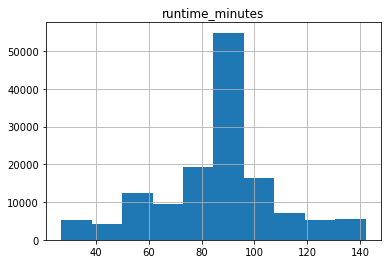

In [15]:
imdb.hist('runtime_minutes')

In [16]:
display(imdb[imdb.duplicated()])
imdb.drop_duplicates(inplace=True)

,tconst,title,release_year,runtime_minutes,genres


In [17]:
imdb['genres'] = imdb.loc[:, 'genres'].str.split(',')
imdb[['genres']]

,genres
0,"[Action, Crime, Drama]"
1,"[Biography, Drama]"
2,[Drama]
3,"[Comedy, Drama]"
4,"[Comedy, Drama, Fantasy]"
...,...
146138,"[Adventure, History, War]"
146139,[Drama]
146140,[Documentary]
146141,[Comedy]


In [18]:
imdb.insert(1, 'clean_title', imdb.loc[:, 'title'].transform(cleaning.process_strings))

In [19]:
imdb.to_json(os.path.join('cleanData', 'imdb.title.basics.json.gz'), compression='gzip')

In [21]:
analysis.combo_table(imdb.explode('genres'), 'tconst', 'genres')

,Action,Crime,Drama,Biography,Comedy,Fantasy,Horror,Thriller,Adventure,Animation,...,Music,Sport,Western,Musical,Adult,News,Talk-Show,Reality-TV,Game-Show,Short
tt0063540,True,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
tt0066787,False,False,True,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
tt0069049,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
tt0069204,False,False,True,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
tt0100275,False,False,True,False,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
tt9916428,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
tt9916538,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
tt9916622,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
tt9916706,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [19]:
# tmdb = pd.read_csv(os.path.join('zippedData', 'tmdb.movies.csv.gz'), index_col=0)
# tmdb_genres = pd.read_csv(os.path.join('zippedData', 'tmdb.genres.csv'), squeeze=True, index_col=0)
# tmdb_genres = tmdb_genres.to_dict()
# tmdb.dropna(inplace=True)
# tmdb['genre_ids'] = cleaning.coerce_list_likes(tmdb['genre_ids'])
# tmdb = utils.map_list_likes(tmdb, 'genre_ids', tmdb_genres)
# tmdb.rename(columns={'genre_ids': 'genres'}, inplace=True)
# tmdb

In [21]:
tn['worldwide_profit'] = tn.eval('worldwide_gross - production_budget')
tn['domestic_profit'] = tn.eval('domestic_gross - production_budget')
tn

,release_year,release_date,title,clean_title,production_budget,domestic_gross,worldwide_gross,tn_id,worldwide_profit,domestic_profit
0,2009,2009-12-18,Avatar,avatar,425000000,760507625,2776345279,0,2351345279,335507625
1,2011,2011-05-20,Pirates of the Caribbean: On Stranger Tides,pirates of the caribbean on stranger tides,410600000,241063875,1045663875,1,635063875,-169536125
2,2019,2019-06-07,Dark Phoenix,dark phoenix,350000000,42762350,149762350,2,-200237650,-307237650
3,2015,2015-05-01,Avengers: Age of Ultron,avengers age of ultron,330600000,459005868,1403013963,3,1072413963,128405868
4,2017,2017-12-15,Star Wars Ep. VIII: The Last Jedi,star wars ep viii the last jedi,317000000,620181382,1316721747,4,999721747,303181382
...,...,...,...,...,...,...,...,...,...,...
5775,2006,2006-05-26,Cavite,cavite,7000,70071,71644,5775,64644,63071
5776,2004,2004-12-31,The Mongol King,the mongol king,7000,900,900,5776,-6100,-6100
5778,1999,1999-04-02,Following,following,6000,48482,240495,5778,234495,42482
5779,2005,2005-07-13,Return to the Land of Wonders,return to the land of wonders,5000,1338,1338,5779,-3662,-3662


In [22]:
tn['worldwide_roi'] = tn.eval('(worldwide_profit / production_budget) * 100')
tn['domestic_roi'] = tn.eval('(domestic_profit / production_budget) * 100')
tn

,release_year,release_date,title,clean_title,production_budget,domestic_gross,worldwide_gross,tn_id,worldwide_profit,domestic_profit,worldwide_roi,domestic_roi
0,2009,2009-12-18,Avatar,avatar,425000000,760507625,2776345279,0,2351345279,335507625,553.257713,78.942971
1,2011,2011-05-20,Pirates of the Caribbean: On Stranger Tides,pirates of the caribbean on stranger tides,410600000,241063875,1045663875,1,635063875,-169536125,154.667286,-41.289850
2,2019,2019-06-07,Dark Phoenix,dark phoenix,350000000,42762350,149762350,2,-200237650,-307237650,-57.210757,-87.782186
3,2015,2015-05-01,Avengers: Age of Ultron,avengers age of ultron,330600000,459005868,1403013963,3,1072413963,128405868,324.384139,38.840250
4,2017,2017-12-15,Star Wars Ep. VIII: The Last Jedi,star wars ep viii the last jedi,317000000,620181382,1316721747,4,999721747,303181382,315.369636,95.640815
...,...,...,...,...,...,...,...,...,...,...,...,...
5775,2006,2006-05-26,Cavite,cavite,7000,70071,71644,5775,64644,63071,923.485714,901.014286
5776,2004,2004-12-31,The Mongol King,the mongol king,7000,900,900,5776,-6100,-6100,-87.142857,-87.142857
5778,1999,1999-04-02,Following,following,6000,48482,240495,5778,234495,42482,3908.250000,708.033333
5779,2005,2005-07-13,Return to the Land of Wonders,return to the land of wonders,5000,1338,1338,5779,-3662,-3662,-73.240000,-73.240000


array([[<AxesSubplot:title={'center':'production_budget'}>,
        <AxesSubplot:title={'center':'domestic_gross'}>],
       [<AxesSubplot:title={'center':'worldwide_gross'}>, <AxesSubplot:>]],
      dtype=object)

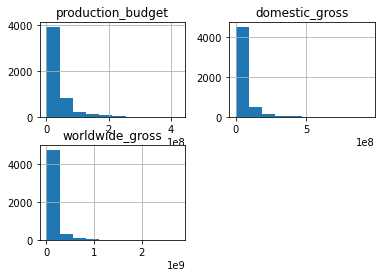

In [23]:
tn[money_cols].hist()

In [24]:
imdb_tn = imdb.reset_index().merge(tn, on=['release_year', 'clean_title'])
imdb_tn.drop(columns=['title_y', 'clean_title'], inplace=True)
imdb_tn.rename(columns={'title_x': 'title'}, inplace=True)

In [25]:
imdb_tn

,index,tconst,title,release_year,runtime_minutes,genres,release_date,production_budget,domestic_gross,worldwide_gross,tn_id,worldwide_profit,domestic_profit,worldwide_roi,domestic_roi
0,54,tt0359950,The Secret Life of Walter Mitty,2013,114.0,"[Adventure, Comedy, Drama]",2013-12-25,91000000,58236838,187861183,436,96861183,-32763162,106.440860,-36.003475
1,58,tt0365907,A Walk Among the Tombstones,2014,114.0,"[Action, Crime, Drama]",2014-09-19,28000000,26017685,62108587,2066,34108587,-1982315,121.816382,-7.079696
2,60,tt0369610,Jurassic World,2015,124.0,"[Action, Adventure, Sci-Fi]",2015-06-12,215000000,652270625,1648854864,33,1433854864,437270625,666.909239,203.381686
3,62,tt0376136,The Rum Diary,2011,119.0,"[Comedy, Drama]",2011-10-28,45000000,13109815,21544732,1315,-23455268,-31890185,-52.122818,-70.867078
4,67,tt0383010,The Three Stooges,2012,92.0,"[Comedy, Family]",2012-04-13,30000000,44338224,54052249,1903,24052249,14338224,80.174163,47.794080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1419,129145,tt7958736,Ma,2019,99.0,"[Horror, Thriller]",2019-05-31,5000000,36049540,44300625,4265,39300625,31049540,786.012500,620.990800
1420,129149,tt7959026,The Mule,2018,116.0,"[Crime, Drama, Thriller]",2018-12-14,50000000,103804407,170857676,1099,120857676,53804407,241.715352,107.608814
1421,131206,tt8155288,Happy Death Day 2U,2019,100.0,"[Drama, Horror, Mystery]",2019-02-13,9000000,28051045,64179495,3777,55179495,19051045,613.105500,211.678278
1422,135841,tt8632862,Fahrenheit 11/9,2018,128.0,[Documentary],2018-09-21,5000000,6352306,6653715,4328,1653715,1352306,33.074300,27.046120


In [26]:
imdb_tn.to_json(os.path.join('cleanData', 'imdb.tn.profit.json.gz'), compression='gzip')

<AxesSubplot:ylabel='title'>

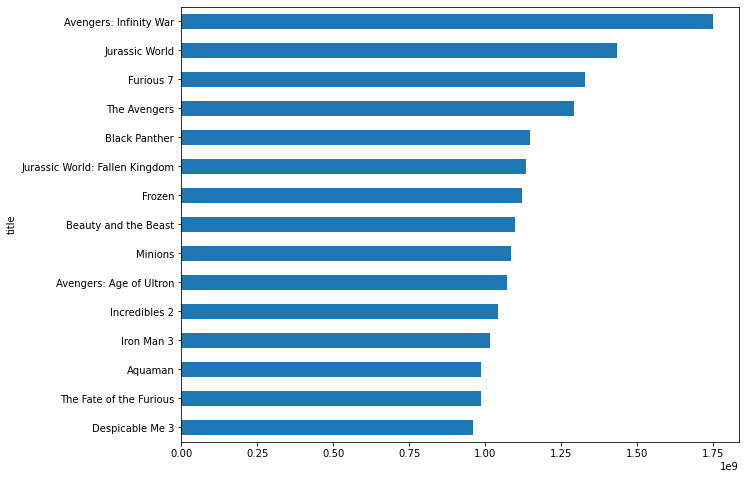

In [27]:
top_profit = imdb_tn[['title','worldwide_profit']].sort_values('worldwide_profit').tail(15)
top_profit.set_index('title').plot.barh(figsize=(10, 8), legend=False)

In [28]:
imdb_tn['profit_decile'] = pd.qcut(imdb_tn['worldwide_profit'], 10, labels=range(10))
imdb_tn['genres'] = imdb_tn.loc[:, 'genres'].map(sorted).str.join(', ')

<AxesSubplot:>

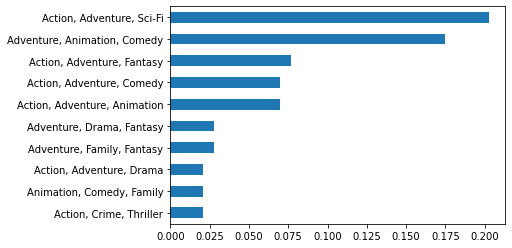

In [29]:
imdb_tn.query('profit_decile == 9')['genres'].value_counts(normalize=True).head(10)[::-1].plot.barh()

<AxesSubplot:>

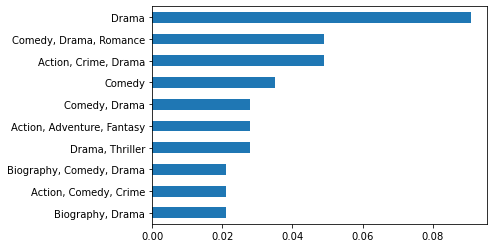

In [30]:
imdb_tn.query('profit_decile == 0')['genres'].value_counts(normalize=True).head(10)[::-1].plot.barh()

In [31]:
imdb_tn['genres'] = imdb_tn.loc[:, 'genres'].str.split(', ')

<AxesSubplot:>

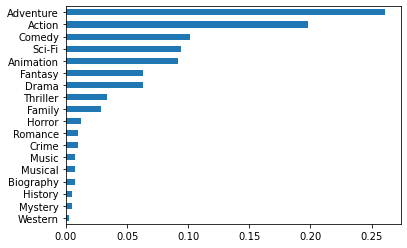

In [32]:
imdb_tn.explode('genres').query('profit_decile == 9')['genres'].value_counts(normalize=True)[::-1].plot.barh()

<AxesSubplot:>

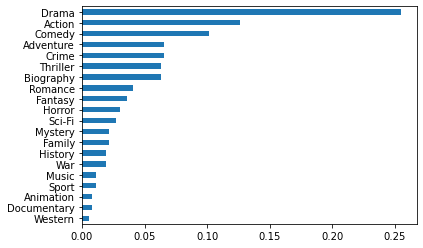

In [33]:
imdb_tn.explode('genres').query('profit_decile == 0')['genres'].value_counts(normalize=True)[::-1].plot.barh()

In [34]:
combos = analysis.expl_combo_table(imdb_tn.set_index('tconst'), 'genres')

In [35]:
combos.to_json(os.path.join('precomputed', 'genre_combos.json'))

<AxesSubplot:>

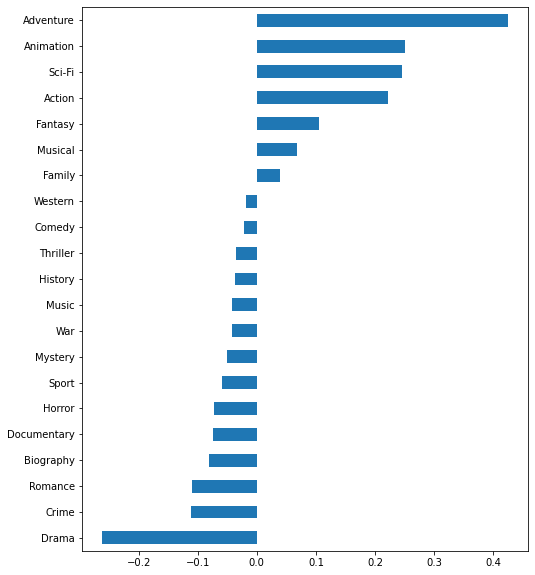

In [36]:
combos.corrwith(imdb_tn.set_index('tconst')['worldwide_profit']).sort_values().plot.barh(figsize=(8, 10))

<AxesSubplot:>

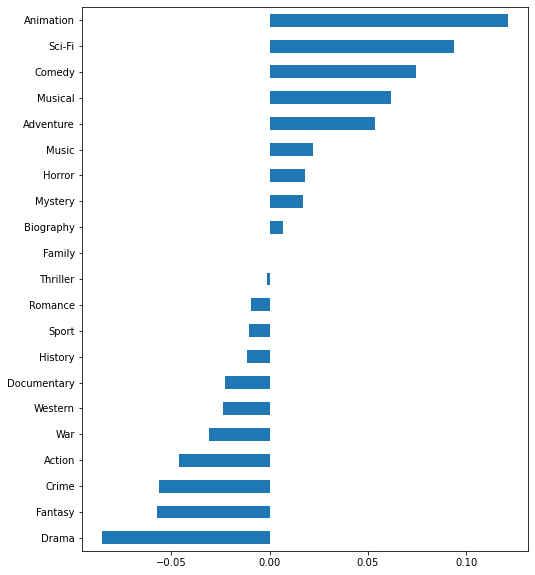

In [37]:
combos.corrwith(imdb_tn.set_index('tconst')['domestic_profit']).sort_values().plot.barh(figsize=(8, 10))

<AxesSubplot:>

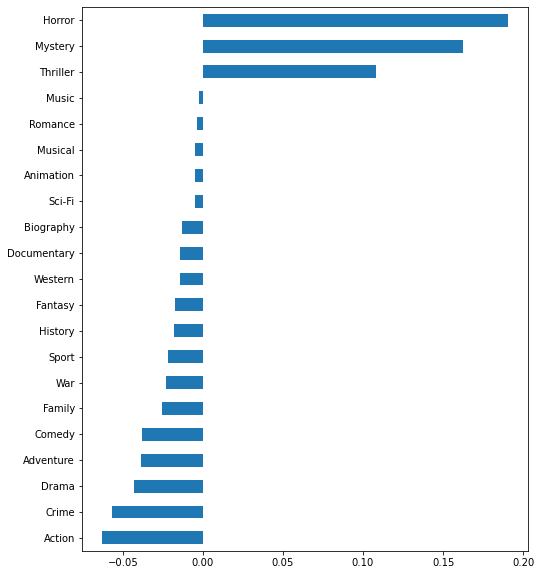

In [38]:
combos.corrwith(imdb_tn.set_index('tconst')['worldwide_roi']).sort_values().plot.barh(figsize=(8, 10))

<AxesSubplot:>

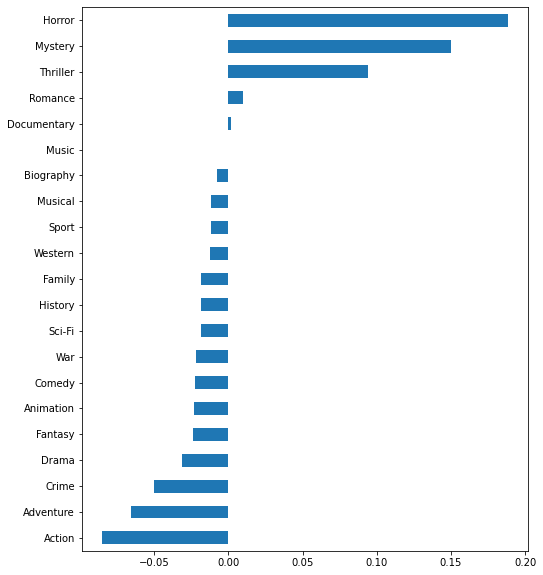

In [39]:
combos.corrwith(imdb_tn.set_index('tconst')['domestic_roi']).sort_values().plot.barh(figsize=(8, 10))

<AxesSubplot:ylabel='genres'>

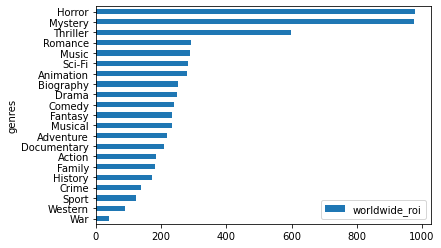

In [40]:
imdb_tn[['genres', 'worldwide_roi']].explode('genres').groupby('genres').mean().sort_values('worldwide_roi').plot.barh()

In [41]:
imdb_tn.set_index('tconst')[['runtime_minutes']].corrwith(imdb_tn.set_index('tconst')['worldwide_roi'])

runtime_minutes   -0.052675
dtype: float64

In [42]:
rt_df = imdb_tn.set_index('tconst')[['runtime_minutes', 'worldwide_roi', 'worldwide_profit']]
rt_df['runtime_hours'] = rt_df['runtime_minutes'] / 60
rt_df['runtime_decile'] = pd.qcut(rt_df['runtime_hours'], 10)
rt_df

,runtime_minutes,worldwide_roi,worldwide_profit,runtime_hours,runtime_decile
tconst,,,,,
tt0359950,114.0,106.440860,96861183,1.900000,"(1.833, 1.933]"
tt0365907,114.0,121.816382,34108587,1.900000,"(1.833, 1.933]"
tt0369610,124.0,666.909239,1433854864,2.066667,"(2.033, 2.2]"
tt0376136,119.0,-52.122818,-23455268,1.983333,"(1.933, 2.033]"
tt0383010,92.0,80.174163,24052249,1.533333,"(1.483, 1.55]"
...,...,...,...,...,...
tt7958736,99.0,786.012500,39300625,1.650000,"(1.633, 1.7]"
tt7959026,116.0,241.715352,120857676,1.933333,"(1.833, 1.933]"
tt8155288,100.0,613.105500,55179495,1.666667,"(1.633, 1.7]"


array([[<AxesSubplot:title={'center':'runtime_hours'}>]], dtype=object)

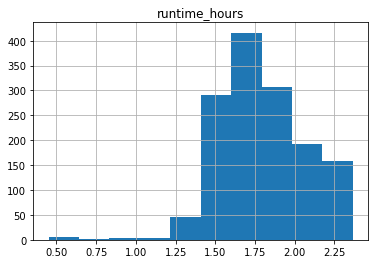

In [43]:
rt_df.hist('runtime_hours')

<AxesSubplot:xlabel='runtime_decile'>

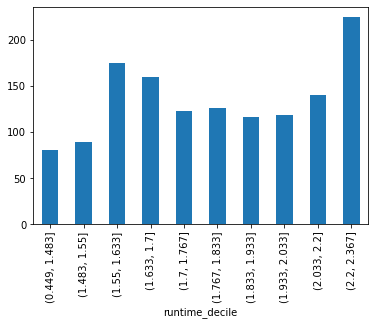

In [44]:
rt_df.groupby('runtime_decile')['worldwide_roi'].median().sort_index().plot.bar()